In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pyforum import forum

# Load data

In [2]:
# Load the data
# Rankings contains three different orderings of the same scores
# We will calculate FORUM - how well each algorithm orders items compared to best possible / random / worst possible - for each
with open('demo_data/rankings.json', 'r') as f:
    rankings = json.load(f)
rankings = {int(k): v for k, v in rankings.items()} # quick cast to int for keys

# Plot the data

Text(0.5, 1.0, 'Cumulative Feature Score Comparison')

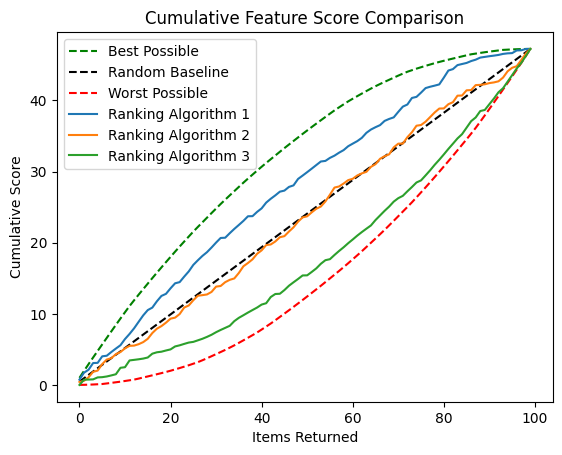

In [3]:
best = sorted(rankings[1], reverse=True) # create best possible (i.e. descending order)
worst = sorted(rankings[1], reverse=False) # create worst possible (i.e. ascending order)
baseline = [np.mean(rankings[1])] * len(rankings[1]) # create random baseline

# Get cumulative feature scores for each ranking algorithm
cumsums = {k: np.cumsum(v) for k, v in rankings.items()}
cumsum_best = np.cumsum(best)
cumsum_worst = np.cumsum(worst)
cumsum_baseline = np.cumsum(baseline)

fig, ax = plt.subplots()
ax.plot(cumsum_best, ls='--', c='g', label='Best Possible')
ax.plot(cumsum_baseline, ls='--', c='k', label='Random Baseline')
ax.plot(cumsum_worst, ls='--', c='r', label='Worst Possible')
for k, v in cumsums.items():
    ax.plot(v, ls='-', label=f'Ranking Algorithm {k}')
ax.legend()

ax.set_xlabel('Items Returned')
ax.set_ylabel('Cumulative Score')
ax.set_title('Cumulative Feature Score Comparison')

Ranking algorithm 1 does consistently better than random as it returns higher scoring items earlier. Ranking algorithm 2 performs close to random. Ranking algorithm 3 does worse than random as it returns lower scoring items earlier. This is reflected in the FORUM scores below.

# Example Usage

## Simple usage

### Individual calculation

In [4]:
forum1 = forum(rankings[1])
print(f'FORUM for ranking 1 over full list: {forum1}')

FORUM for ranking 1 over full list: 0.5362748885236881


### Iterating over several ranking algorithms

In [5]:
for k, v in rankings.items():
    print(f'FORUM for algorithm {k} over full list: {forum(v)}')

FORUM for algorithm 1 over full list: 0.5362748885236881
FORUM for algorithm 2 over full list: -0.057821369583629774
FORUM for algorithm 3 over full list: -0.7138783592203158


### Iterating over several ranking algorithms, but only for first 10 items returned

In [6]:
for k, v in rankings.items():
    print(f'FORUM for algorithm {k} over 10 items: {forum(v[:10], v)}') # note first arg is the top 10 items, second arg is the full list

FORUM for algorithm 1 over 10 items: 0.3957123194278645
FORUM for algorithm 2 over 10 items: -0.08034443344451547
FORUM for algorithm 3 over 10 items: -0.6148253653767992


### Iterating over several ranking algorithms, for the first 10, 50, and full list of items returned

In [7]:
for k, v in rankings.items():
    fdict = forum(v, ns=[10, 50, len(v)]) # Uses ns argument to calculate FORUM for top 10, top 50, and full list
    print(f'FORUM for algorithm {k} over:')
    for n, f in fdict.items():
        print(f'\t{n} items: {f}')

FORUM for algorithm 1 over:
	10 items: 0.3957123194278645
	50 items: 0.45162925654352487
	100 items: 0.5362748885236881
FORUM for algorithm 2 over:
	10 items: -0.08034443344451547
	50 items: -0.07774123255323667
	100 items: -0.057821369583629774
FORUM for algorithm 3 over:
	10 items: -0.6148253653767992
	50 items: -0.6437790312685461
	100 items: -0.7138783592203158


## Verifying that best, worst, and random are correct

In [12]:
print('Best: ', forum(best))
print('Baseline: ', forum(baseline, best))
print('Worst: ', forum(worst))

Best:  1.0
Baseline:  -1.4215113584450631e-15
Worst:  -1.0
